Identify unexpected events in dataset

2 assumptions
- occurance frequency is low
- features differ from normal occurences 

In [1]:
import pandas as pd 

df = pd.read_excel('../input/superstore/Superstore.xls')
df.head()

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Univariate anomaly detection

Identify outliers from distribution of values in a single feature environment 

Analyze sales and profit separately 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use(['fivethirtyeight', 'dark_background'])
import seaborn as sns 

In [3]:
df.Sales.describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

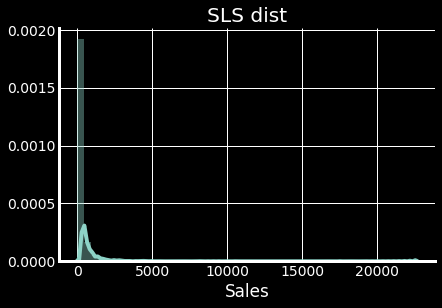

In [4]:
sns.distplot(df['Sales'])
plt.title('SLS dist')
sns.despine()

In [5]:
print('Kurtosis: %f' % df['Sales'].kurt())
print('Skewness: %f' % df['Sales'].skew())

Kurtosis: 305.311753
Skewness: 12.972752


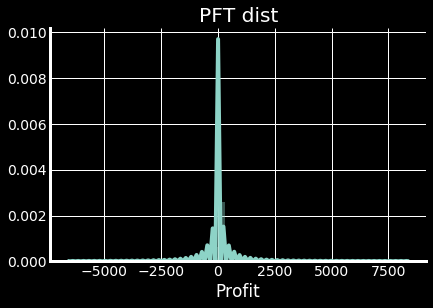

In [6]:
sns.distplot(df['Profit'])
plt.title('PFT dist')
sns.despine()

In [7]:
from sklearn.ensemble import IsolationForest

# algo for detecting anomalies 

Ifo isolates observations / creates partition trees through random selection of features.
Followed by random selection of a split value between max and min value of a selected feature. 



# SLS 

In [8]:
# Specify model 

# Train on sales     
ifo = IsolationForest(n_estimators = 100)

ifo.fit(df['Sales'].values.reshape(-1, 1))

# Store in NumPy array 
min_max = np.linspace(df['Sales'].min(),
                      df['Sales'].max(), 
                      len(df)).reshape(-1, 1)

# Compute anomaly score for each observation 
    # input score is computed as the mean score of all trees 
anomaly_score = ifo.decision_function(min_max)

# Classify each observation as outlier or not
outliers = ifo.predict(min_max)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


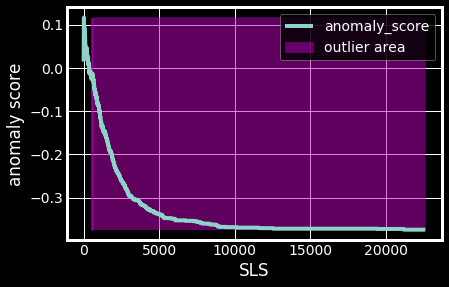

In [9]:
plt.plot(min_max, anomaly_score, label = 'anomaly_score')

plt.fill_between(min_max.T[0], 
                 np.min(anomaly_score), 
                 np.max(anomaly_score),
                 where = outliers == -1, 
                 color = 'm',
                 alpha = .5, 
                 label = 'outlier area')

plt.legend()
plt.xlabel('SLS')
plt.ylabel('anomaly score')
plt.show();

SLS > 1000 = outliers 

Outliers appear as anomaly score decreases

In [10]:
df.loc[df['Sales'] > 1000].head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.184,9,0.2,85.3092
24,25,CA-2015-106320,2015-09-25,2015-09-30,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,...,84057,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.630,3,0.0,240.2649
27,28,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.430,7,0.5,-1665.0522
35,36,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737
54,55,CA-2016-105816,2016-12-11,2016-12-17,Standard Class,JM-15265,Janet Molinari,Corporate,United States,New York City,...,10024,East,TEC-PH-10002447,Technology,Phones,AT&T CL83451 4-Handset Telephone,1029.950,5,0.0,298.6855


In [11]:
# Check index 10 
df.iloc[10]

Row ID                                                 11
Order ID                                   CA-2014-115812
Order Date                            2014-06-09 00:00:00
Ship Date                             2014-06-14 00:00:00
Ship Mode                                  Standard Class
Customer ID                                      BH-11710
Customer Name                             Brosina Hoffman
Segment                                          Consumer
Country                                     United States
City                                          Los Angeles
State                                          California
Postal Code                                         90032
Region                                               West
Product ID                                FUR-TA-10001539
Category                                        Furniture
Sub-Category                                       Tables
Product Name     Chromcraft Rectangular Conference Tables
Sales         

Doesn't seem out of order.

# PFT 

In [12]:
ifo = IsolationForest(n_estimators = 100)

ifo.fit(df['Profit'].values.reshape(-1, 1))

min_max = np.linspace(df['Profit'].min(),
                      df['Profit'].max(),
                      len(df)).reshape(-1, 1)

anomaly_score = ifo.decision_function(min_max)

outliers = ifo.predict(min_max)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


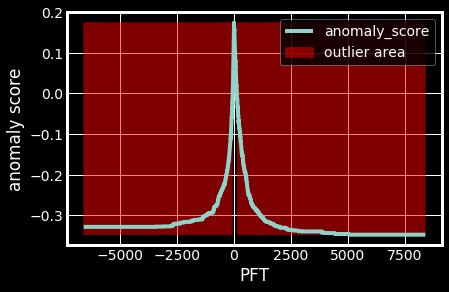

In [13]:
plt.plot(min_max, anomaly_score, label = 'anomaly_score')
plt.fill_between(min_max.T[0], 
                 np.min(anomaly_score),
                 np.max(anomaly_score),
                 where = outliers == -1,
                 color = 'r',
                 alpha = 0.5, 
                 label = 'outlier area')

plt.legend()
plt.xlabel('PFT')
plt.ylabel('anomaly score')
plt.show();

-100 > PFT > 100  = outlier 

In [14]:
df.loc[df['Profit'] > 100].head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820
13,14,CA-2016-161389,2016-12-05,2016-12-10,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,...,98103,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,3,0.2,132.5922
24,25,CA-2015-106320,2015-09-25,2015-09-30,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,...,84057,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.630,3,0.0,240.2649
35,36,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737
54,55,CA-2016-105816,2016-12-11,2016-12-17,Standard Class,JM-15265,Janet Molinari,Corporate,United States,New York City,...,10024,East,TEC-PH-10002447,Technology,Phones,AT&T CL83451 4-Handset Telephone,1029.950,5,0.0,298.6855


In [15]:
df.iloc[54]

Row ID                                         55
Order ID                           CA-2016-105816
Order Date                    2016-12-11 00:00:00
Ship Date                     2016-12-17 00:00:00
Ship Mode                          Standard Class
Customer ID                              JM-15265
Customer Name                      Janet Molinari
Segment                                 Corporate
Country                             United States
City                                New York City
State                                    New York
Postal Code                                 10024
Region                                       East
Product ID                        TEC-PH-10002447
Category                               Technology
Sub-Category                               Phones
Product Name     AT&T CL83451 4-Handset Telephone
Sales                                     1029.95
Quantity                                        5
Discount                                        0


Model determined 54 to be anomaly, could possibly be a product with higher margins

In [16]:
df.loc[df['Profit'] < -100].head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
14,15,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580
27,28,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522
36,37,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5,0.60,-147.9630
72,73,US-2015-134026,2015-04-26,2015-05-02,Standard Class,JE-15745,Joel Eaton,Consumer,United States,Memphis,...,38109,South,FUR-CH-10000513,Furniture,Chairs,High-Back Leather Manager's Chair,831.9360,8,0.20,-114.3912


In [17]:
df.iloc[27]

Row ID                                                          28
Order ID                                            US-2015-150630
Order Date                                     2015-09-17 00:00:00
Ship Date                                      2015-09-21 00:00:00
Ship Mode                                           Standard Class
Customer ID                                               TB-21520
Customer Name                                      Tracy Blumstein
Segment                                                   Consumer
Country                                              United States
City                                                  Philadelphia
State                                                 Pennsylvania
Postal Code                                                  19140
Region                                                        East
Product ID                                         FUR-BO-10004834
Category                                                 Furni

# Multivariate anomaly detection 

unsupervised models
- KNN
- CBLOF 
- HBOS
- Isolation Forest

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

!pip install pyod
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF

from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF

from scipy import stats

     |████████████████████████████████| 92kB 3.5MB/s 
  Created wheel for pyod: filename=pyod-0.7.4-cp36-none-any.whl size=95437 sha256=58cb157570579a4022469098706a0b919552ed5fe960aa8eae4959599854171e
  Stored in directory: /tmp/.cache/pip/wheels/30/2f/4a/90c7bf3403325384b1c2ef5eb50d65d7467b8dd1b64a92ab82
Successfully built pyod


In [19]:
from numpy import percentile
import matplotlib

In [20]:
df = df.rename(columns = {'Sales': 'SLS', 'Profit': 'PFT'})
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,SLS,Quantity,Discount,PFT
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [21]:
cols = ['SLS', 'PFT']
df[cols].head()

,SLS,PFT
0,261.9600,41.9136
1,731.9400,219.5820
2,14.6200,6.8714
3,957.5775,-383.0310
4,22.3680,2.5164


In [22]:
# Scale features,
    # lest create error Contour levels must be increasing
    
minmax = MinMaxScaler(feature_range = (0, 1))
df[['SLS','PFT']] = minmax.fit_transform(df[['SLS','PFT']])
df[['SLS','PFT']].head()

,SLS,PFT
0,0.011552,0.442794
1,0.032313,0.454639
2,0.000626,0.440458
3,0.042280,0.414464
4,0.000968,0.440168


Expect positive corr

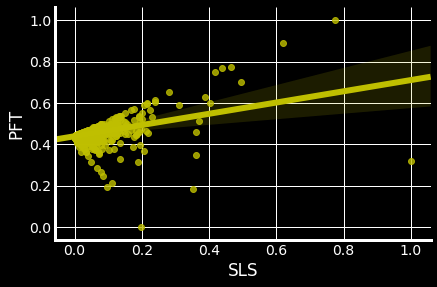

In [23]:
# Plot corr
sns.regplot(x = 'SLS', 
            y = 'PFT', data = df,
            color = 'y')

sns.despine();

Points that are non-positive corr = outliers 

In [24]:
X1 = df['SLS'].values.reshape(-1,1)
X2 = df['PFT'].values.reshape(-1,1)

X = np.concatenate((X1,X2),axis=1)

# KNN
- simplest detection method 
- Distance to kth nearest neighbour = viewed as outlier score

OUTLIERS:  91 INLIERS:  9903


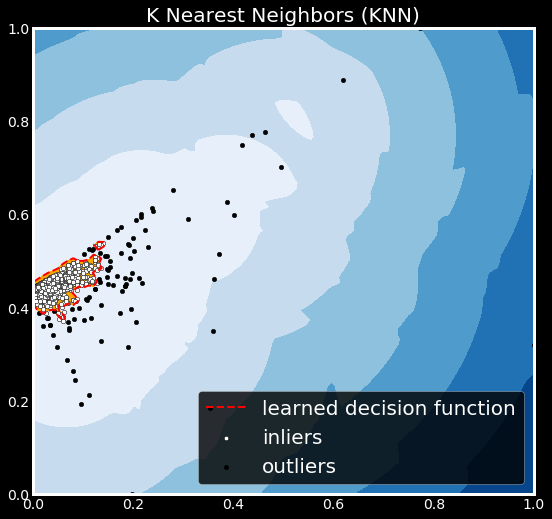

In [25]:
outliers_fraction = 0.01
xx , yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
clf = KNN(contamination=outliers_fraction)
clf.fit(X)
scores_pred = clf.decision_function(X) * -1
y_pred = clf.predict(X)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
plt.figure(figsize=(8, 8))

# Prediction dataframe
df1 = df
df1['outlier'] = y_pred.tolist()
    
# sales - inlier feature 1,  profit - inlier feature 2
inliers_sales = np.array(df1['SLS'][df1['outlier'] == 0]).reshape(-1,1)
inliers_profit = np.array(df1['PFT'][df1['outlier'] == 0]).reshape(-1,1)
    
# sales - outlier feature 1, profit - outlier feature 2
outliers_sales = df1['SLS'][df1['outlier'] == 1].values.reshape(-1,1)
outliers_profit = df1['PFT'][df1['outlier'] == 1].values.reshape(-1,1)
         
print('OUTLIERS: ',n_outliers,'INLIERS: ',n_inliers)

threshold = percentile(scores_pred, 100 * outliers_fraction)

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
b = plt.scatter(inliers_sales, inliers_profit, c='white',s=20, edgecolor='k')    
c = plt.scatter(outliers_sales, outliers_profit, c='black',s=20, edgecolor='k')  

plt.axis('tight')  
plt.legend([a.collections[0], b,c], ['learned decision function', 'inliers','outliers'],
           prop=matplotlib.font_manager.FontProperties(size=20),loc='lower right')      
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.title('K Nearest Neighbors (KNN)')
plt.show();

# Isolation forest
- Isolate observations through random feature selection 
- Random select a split value between max and min values of selected feature 

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


OUTLIERS:  100 INLIERS:  9894


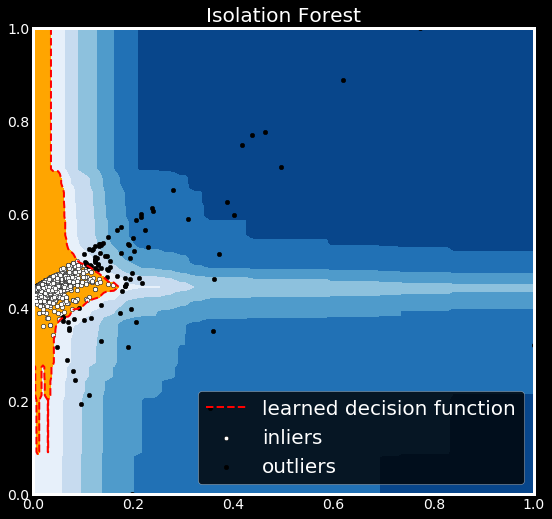

In [26]:
outliers_fraction = 0.01
xx , yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
clf = IForest(contamination=outliers_fraction,random_state=0)
clf.fit(X)
scores_pred = clf.decision_function(X) * -1

y_pred = clf.predict(X)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
plt.figure(figsize=(8, 8))

df1 = df
df1['outlier'] = y_pred.tolist()
    
# sales - inlier feature 1,  profit - inlier feature 2
inliers_sales = np.array(df1['SLS'][df1['outlier'] == 0]).reshape(-1,1)
inliers_profit = np.array(df1['PFT'][df1['outlier'] == 0]).reshape(-1,1)
    
# sales - outlier feature 1, profit - outlier feature 2
outliers_sales = df1['SLS'][df1['outlier'] == 1].values.reshape(-1,1)
outliers_profit = df1['PFT'][df1['outlier'] == 1].values.reshape(-1,1)
         
print('OUTLIERS: ',n_outliers,'INLIERS: ',n_inliers)

threshold = percentile(scores_pred, 100 * outliers_fraction)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
b = plt.scatter(inliers_sales, inliers_profit, c='white',s=20, edgecolor='k')
    
c = plt.scatter(outliers_sales, outliers_profit, c='black',s=20, edgecolor='k')
       
plt.axis('tight')
plt.legend([a.collections[0], b,c], ['learned decision function', 'inliers','outliers'],
           prop=matplotlib.font_manager.FontProperties(size=20),loc='lower right')      
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.title('Isolation Forest')
plt.show();

# Cluster-based Local Outlier Factor (CBLOF)

Calc outlier score based on CBLOF 

- Anomaly score = distance of each observation to center of cluster x observations in the center 

- Scale SLS & PFT (0-1)

- Set outlier fractions as 1% based on trial 

- Fit CBLOF model 

- Identify outlier using threshold value 

- Calc anomaly score for every point using decision function

In [27]:
outliers_fraction = 0.01

xx , yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))

clf = CBLOF(contamination = outliers_fraction,
            check_estimator = False, random_state = 0)
clf.fit(X)

# predict raw anomaly score
scores_pred = clf.decision_function(X) * -1
        
# Identify point as outlier or inlier
y_pred = clf.predict(X)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)

In [28]:
# Features 
df1 = df
df1['outlier'] = y_pred.tolist() # store predictions in df
    
# 
inliers_sales = np.array(df1['SLS'][df1['outlier'] == 0]).reshape(-1,1)
inliers_profit = np.array(df1['PFT'][df1['outlier'] == 0]).reshape(-1,1)
    
# sales - outlier feature 1, profit - outlier feature 2
outliers_sales = df1['SLS'][df1['outlier'] == 1].values.reshape(-1,1)
outliers_profit = df1['PFT'][df1['outlier'] == 1].values.reshape(-1,1)
         
print('OUTLIERS:',n_outliers,
      'INLIERS:',n_inliers)

OUTLIERS: 100 INLIERS: 9894


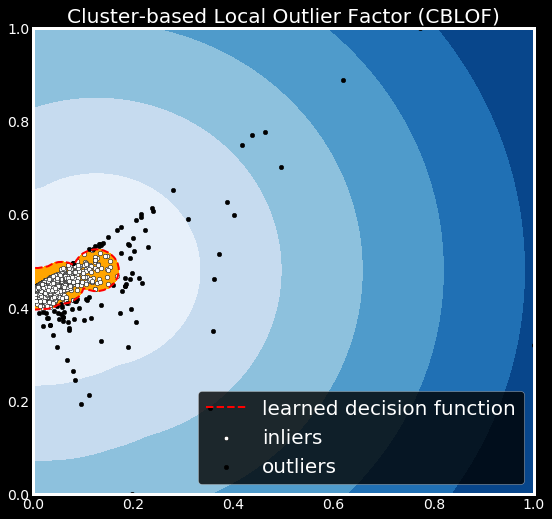

In [29]:
plt.figure(figsize=(8, 8))

# Threshold val for identifying outs and ins 
threshold = percentile(scores_pred, 100 * outliers_fraction)
        
# decision function calculates the raw anomaly score for every point
Z = clf.decision_function(np.c_[xx.ravel(), 
                                yy.ravel()]) * -1
Z = Z.reshape(xx.shape)
# fill blue map colormap from minimum anomaly score to threshold value
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 
                                           threshold, 7),
             cmap = plt.cm.Blues_r)

# red contour line where anomaly score =thresold
a = plt.contour(xx, yy, Z, 
                levels=[threshold],
                linewidths = 2, colors = 'red')
        
# orange contour lines where range of anomaly score covers threshold val to max anomaly score
plt.contourf(xx, yy, Z, 
             levels = [threshold, Z.max()],
             colors = 'orange')

b = plt.scatter(inliers_sales, inliers_profit, 
                c = 'white',s = 20, edgecolor = 'k')
    
c = plt.scatter(outliers_sales, outliers_profit, 
                c = 'black',s=20, edgecolor = 'k')
       
plt.axis('tight')   
plt.legend([a.collections[0], b,c],
           ['learned decision function', 'inliers','outliers'],
           prop = matplotlib.font_manager.FontProperties(size = 20),
           loc = 'lower right')
      
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.title('Cluster-based Local Outlier Factor (CBLOF)')
plt.show();

# Hist-based Outlier Detection (HBOS) 

- Assume feature independence 
- Calc degree of anomalies using hist

OUTLIERS: 90 INLIERS: 9904


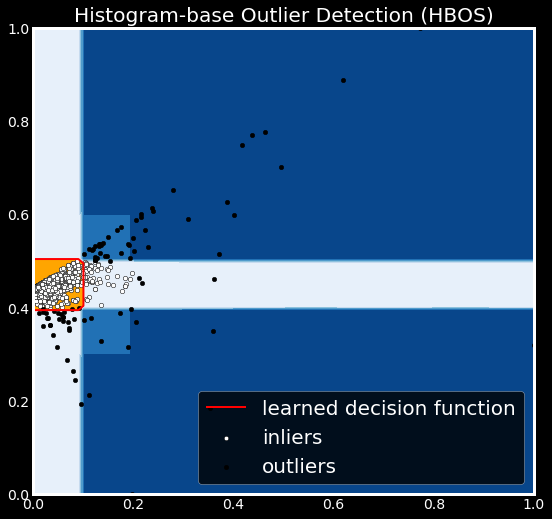

In [30]:
outliers_fraction = 0.01
xx , yy = np.meshgrid(np.linspace(0, 1, 100), 
                      np.linspace(0, 1, 100))
clf = HBOS(contamination = outliers_fraction)
clf.fit(X)

scores_pred = clf.decision_function(X) * -1
y_pred = clf.predict(X)

n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)

plt.figure(figsize = (8, 8))

df1 = df
df1['outlier'] = y_pred.tolist()
    
inliers_sales = np.array(df1['SLS'][df1['outlier'] == 0]).reshape(-1,1)
inliers_profit = np.array(df1['PFT'][df1['outlier'] == 0]).reshape(-1,1)
    

outliers_sales = df1['SLS'][df1['outlier'] == 1].values.reshape(-1,1)
outliers_profit = df1['PFT'][df1['outlier'] == 1].values.reshape(-1,1)
         
print('OUTLIERS:',n_outliers,'INLIERS:',n_inliers)
threshold = percentile(scores_pred, 100 * outliers_fraction)

Z = clf.decision_function(np.c_[xx.ravel(), 
                                yy.ravel()]) * -1
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, 
             levels = np.linspace(Z.min(), 
                                           threshold, 7),
             cmap = plt.cm.Blues_r)

a = plt.contour(xx, yy, Z, levels = [threshold],
                linewidths=2, colors='red')

plt.contourf(xx, yy, Z, 
             levels = [threshold, Z.max()],
             colors = 'orange')

b = plt.scatter(inliers_sales, inliers_profit, 
                c ='white',s=20, edgecolor='k')
    
c = plt.scatter(outliers_sales, outliers_profit, 
                c ='black',s=20, edgecolor='k')
       
plt.axis('tight')      
plt.legend([a.collections[0], b,c], 
           ['learned decision function', 'inliers','outliers'],
           prop = matplotlib.font_manager.FontProperties(size = 20),
           loc='lower right')      

plt.xlim((0, 1))
plt.ylim((0, 1))
plt.title('Histogram-base Outlier Detection (HBOS)')
plt.show();

all 4 models predicts anomalies very similarly

# Check predictions 
- view outliers determined by model 
    (HBOS)

In [31]:
# Predicted outliers 
df1.loc[df1['outlier'] == 1].tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,SLS,Quantity,Discount,PFT,outlier
9270,9271,US-2017-102183,2017-08-21,2017-08-28,Standard Class,PK-19075,Pete Kriz,Consumer,United States,New York City,...,East,OFF-BI-10001359,Office Supplies,Binders,GBC DocuBind TL300 Electric Binding System,0.190171,6,0.2,0.536875,1
9639,9640,CA-2015-116638,2015-01-28,2015-01-31,Second Class,JH-15985,Joseph Holt,Consumer,United States,Concord,...,South,FUR-TA-10000198,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,0.189822,13,0.4,0.315845,1
9741,9742,CA-2015-117086,2015-11-08,2015-11-12,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,...,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",0.194560,5,0.0,0.507542,1
9774,9775,CA-2014-169019,2014-07-26,2014-07-30,Standard Class,LF-17185,Luke Foster,Consumer,United States,San Antonio,...,Central,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,0.096172,8,0.8,0.193206,1
9929,9930,CA-2016-129630,2016-09-04,2016-09-04,Same Day,IM-15055,Ionia McGrath,Consumer,United States,San Francisco,...,West,TEC-CO-10003763,Technology,Copiers,Canon PC1060 Personal Laser Copier,0.123664,5,0.2,0.502999,1


In [32]:
# Reload to view features at original scale 
df = pd.read_excel('../input/superstore/Superstore.xls')

In [33]:
df.iloc[9649]

Row ID                                            9650
Order ID                                CA-2016-107104
Order Date                         2016-11-26 00:00:00
Ship Date                          2016-11-30 00:00:00
Ship Mode                               Standard Class
Customer ID                                   MS-17365
Customer Name                      Maribeth Schnelling
Segment                                       Consumer
Country                                  United States
City                                       Los Angeles
State                                       California
Postal Code                                      90045
Region                                            West
Product ID                             FUR-BO-10002213
Category                                     Furniture
Sub-Category                                 Bookcases
Product Name     DMI Eclipse Executive Suite Bookcases
Sales                                          3406.66
Quantity  

- quantity = 5
- discount = 15%
- total price = 3406.66
- profit = 160.314

0.04% profit 

Profit too small, model identified this order as anomaly

In [34]:
df.iloc[9741]

Row ID                                                        9742
Order ID                                            CA-2015-117086
Order Date                                     2015-11-08 00:00:00
Ship Date                                      2015-11-12 00:00:00
Ship Mode                                           Standard Class
Customer ID                                               QJ-19255
Customer Name                                         Quincy Jones
Segment                                                  Corporate
Country                                              United States
City                                                    Burlington
State                                                      Vermont
Postal Code                                                   5408
Region                                                        East
Product ID                                         FUR-BO-10004834
Category                                                 Furni

1013 / 4404.9 = 22% profit 

In [35]:
df.iloc[9774]

Row ID                                                9775
Order ID                                    CA-2014-169019
Order Date                             2014-07-26 00:00:00
Ship Date                              2014-07-30 00:00:00
Ship Mode                                   Standard Class
Customer ID                                       LF-17185
Customer Name                                  Luke Foster
Segment                                           Consumer
Country                                      United States
City                                           San Antonio
State                                                Texas
Postal Code                                          78207
Region                                             Central
Product ID                                 OFF-BI-10004995
Category                                   Office Supplies
Sub-Category                                       Binders
Product Name     GBC DocuBind P400 Electric Binding Syst

negative profit
possible clearance item

In [36]:
df.iloc[9270]

Row ID                                                 9271
Order ID                                     US-2017-102183
Order Date                              2017-08-21 00:00:00
Ship Date                               2017-08-28 00:00:00
Ship Mode                                    Standard Class
Customer ID                                        PK-19075
Customer Name                                     Pete Kriz
Segment                                            Consumer
Country                                       United States
City                                          New York City
State                                              New York
Postal Code                                           10035
Region                                                 East
Product ID                                  OFF-BI-10001359
Category                                    Office Supplies
Sub-Category                                        Binders
Product Name     GBC DocuBind TL300 Elec

20% discont 
4305 total price 
1453 / 4305 = 33% profit 

In [37]:
df.iloc[9857]

Row ID                                                        9858
Order ID                                            CA-2015-164301
Order Date                                     2015-03-26 00:00:00
Ship Date                                      2015-03-30 00:00:00
Ship Mode                                           Standard Class
Customer ID                                               EB-13840
Customer Name                                        Ellis Ballard
Segment                                                  Corporate
Country                                              United States
City                                                       Seattle
State                                                   Washington
Postal Code                                                  98103
Region                                                        West
Product ID                                         FUR-TA-10001889
Category                                                 Furni

18% profit 